In [1]:
import torch
import random
import argparse
from trainGAT import GATClassifier  # Update this to your actual import
from visualize_attention import visualize_attention  # from above
from torch_geometric.data import DataLoader

In [2]:
data_list = torch.load("WRtoNTautoTauTauJJ_WR3000_N600/tree_1.pt",weights_only=False)

In [18]:
graph = random.choice(data_list)
input_dim = graph.x.shape[1]
model = GATClassifier(input_dim)

In [19]:
model.load_state_dict(torch.load("models/gat_epoch_4.pth",weights_only=False))

<All keys matched successfully>

In [20]:
model.eval()

GATClassifier(
  (conv1): GATConv(12, 64, heads=4)
  (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (conv2): GATConv(256, 64, heads=1)
  (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (lin): Linear(in_features=128, out_features=1, bias=True)
)

Prediction: 0.9982513785362244


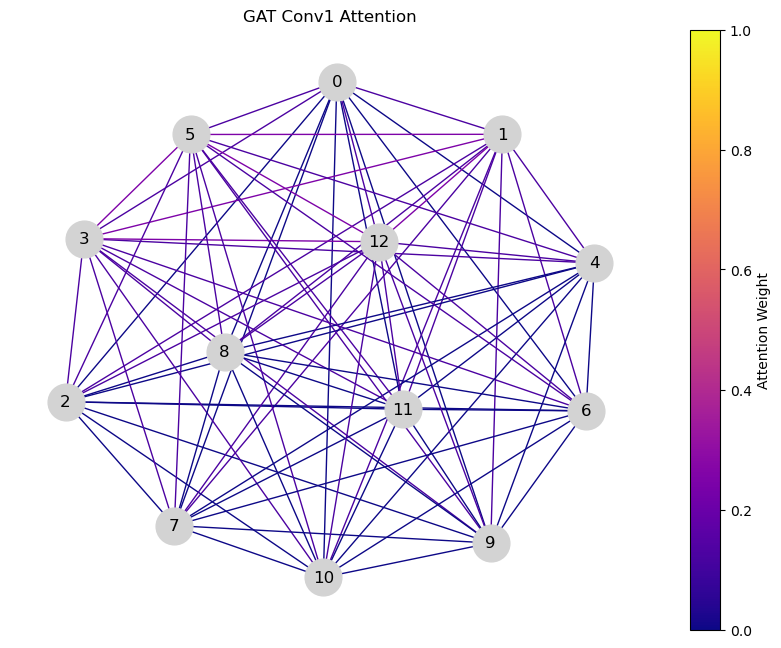

In [21]:
with torch.no_grad():
        output, attn = model(graph.x, graph.edge_index, graph.batch if hasattr(graph, "batch") else torch.zeros(graph.x.size(0), dtype=torch.long), return_attention=True)

        print("Prediction:", torch.sigmoid(output).item())
        edge_index, alpha = attn["conv1"]
        visualize_attention(graph, edge_index, alpha, title="GAT Conv1 Attention")

Prediction: 0.9982513785362244


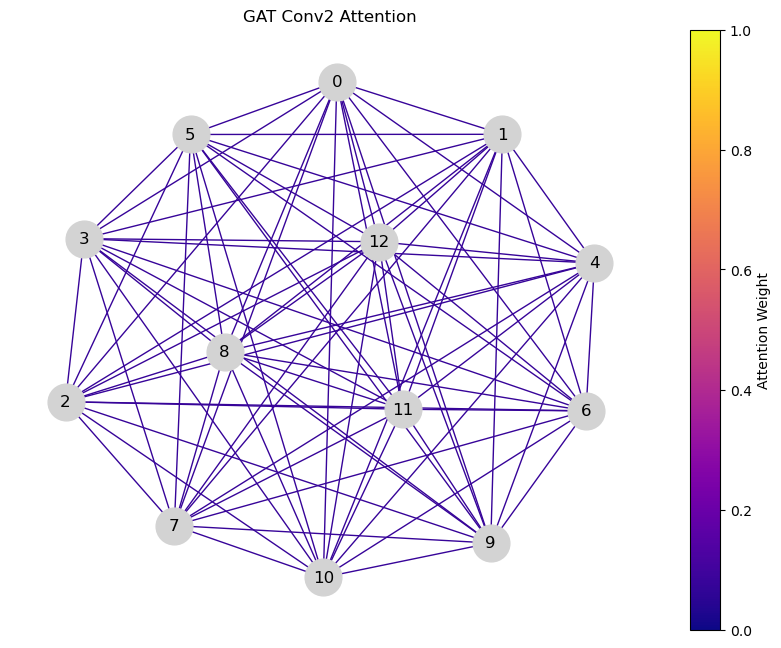

In [22]:
with torch.no_grad():
        output, attn = model(graph.x, graph.edge_index, graph.batch if hasattr(graph, "batch") else torch.zeros(graph.x.size(0), dtype=torch.long), return_attention=True)

        print("Prediction:", torch.sigmoid(output).item())
        edge_index, alpha = attn["conv2"]
        visualize_attention(graph, edge_index, alpha, title="GAT Conv2 Attention")